## **Clasificación utilizando XGBoost (Core)**

**Clasificación utilizando XGBoost (Core)**

**Objetivo:** Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

**Dataset: Heart Disease UCI**

**Descripción del Dataset:** El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.

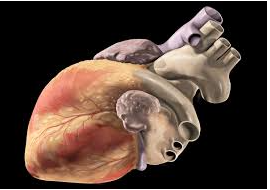

**Instrucciones:**


**Parte 1: Carga y Exploración Inicial de Datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('../data/heart_disease_uci.csv')

# Exploración de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


**Exploración Inicial:**
* Revisar la estructura del dataset.
* Describir las variables y su distribución.
* Identificar y documentar valores faltantes y outliers.

In [3]:
# Estructura del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [4]:
# Primeras filas
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [5]:
# Resumen estadístico
print(df.describe(include='all'))

                id         age   sex    dataset            cp    trestbps  \
count   920.000000  920.000000   920        920           920  861.000000   
unique         NaN         NaN     2          4             4         NaN   
top            NaN         NaN  Male  Cleveland  asymptomatic         NaN   
freq           NaN         NaN   726        304           496         NaN   
mean    460.500000   53.510870   NaN        NaN           NaN  132.132404   
std     265.725422    9.424685   NaN        NaN           NaN   19.066070   
min       1.000000   28.000000   NaN        NaN           NaN    0.000000   
25%     230.750000   47.000000   NaN        NaN           NaN  120.000000   
50%     460.500000   54.000000   NaN        NaN           NaN  130.000000   
75%     690.250000   60.000000   NaN        NaN           NaN  140.000000   
max     920.000000   77.000000   NaN        NaN           NaN  200.000000   

              chol    fbs restecg      thalch  exang     oldpeak slope  \
c

In [6]:
# Valores únicos por columna
print(df.nunique())

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64


In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**Descripción de las variables y su distribución
Visualización**

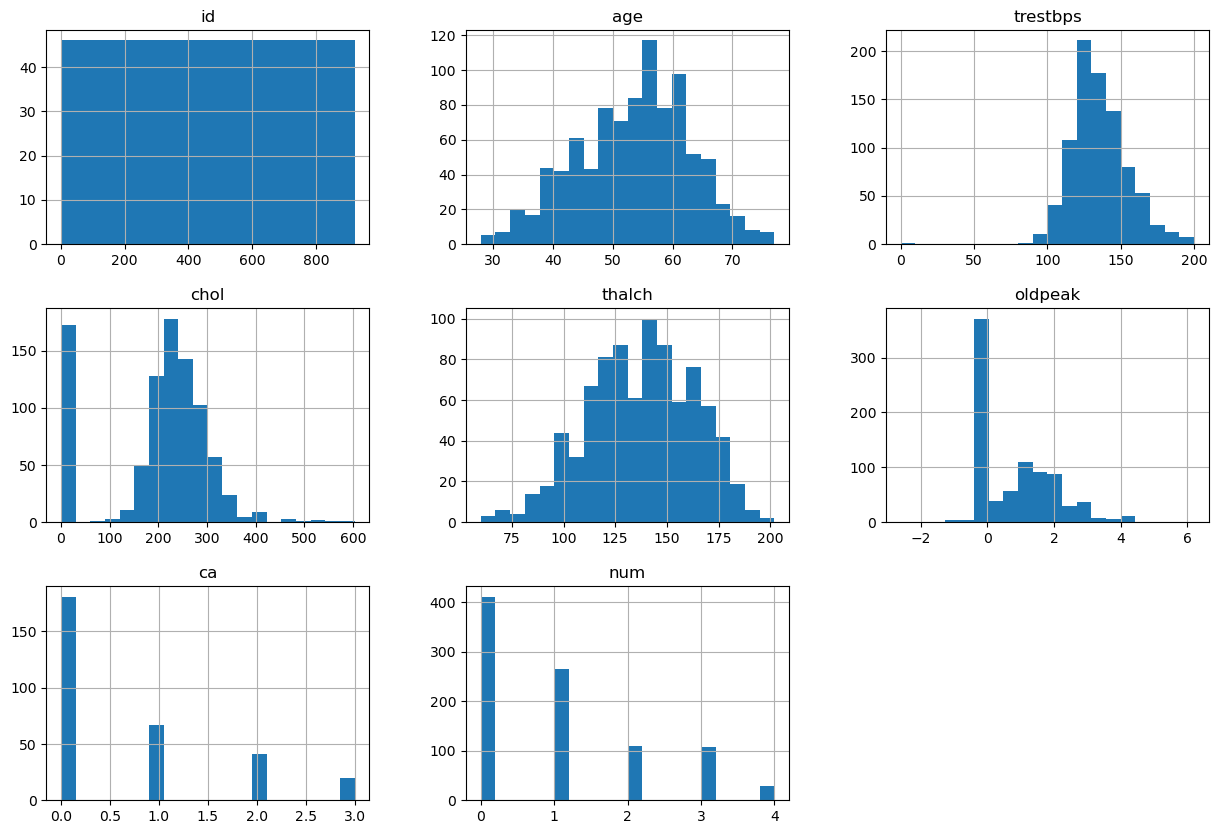

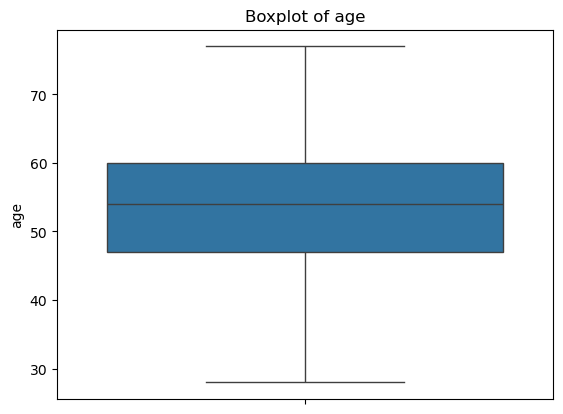

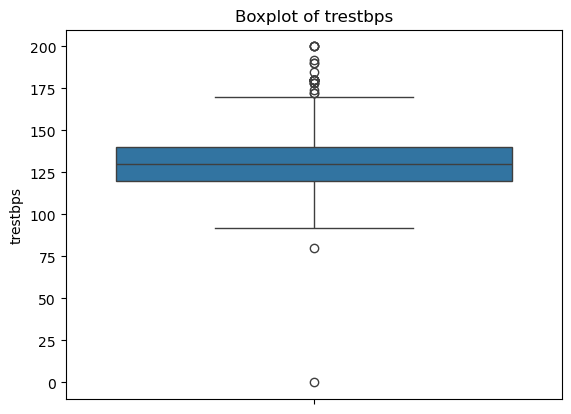

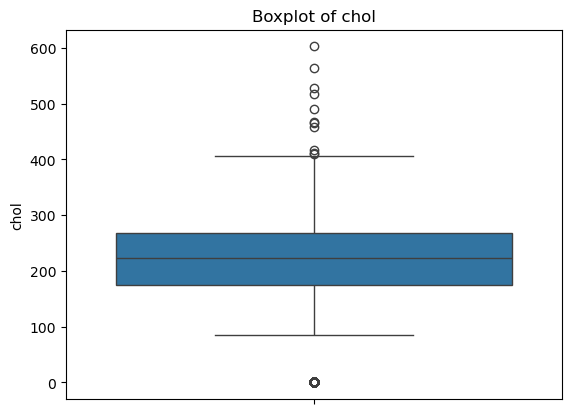

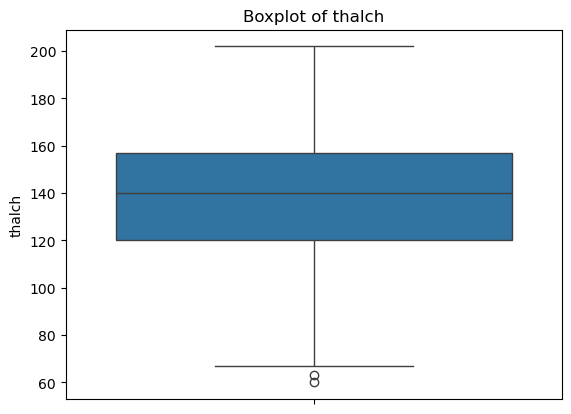

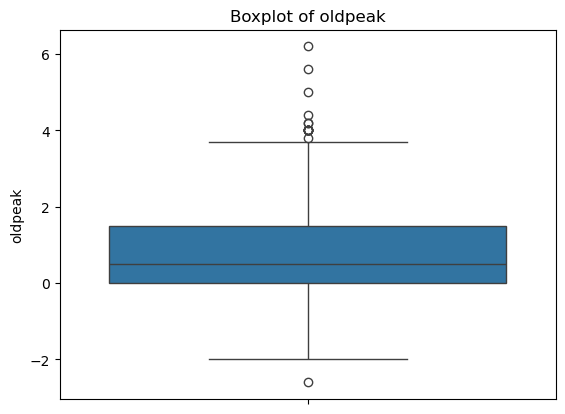

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramas para variables numéricas
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Boxplots para identificar outliers
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**Variables categóricas**

In [9]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in cat_cols:
    print(f"Distribución de {col}:\n{df[col].value_counts()}\n")

Distribución de sex:
sex
Male      726
Female    194
Name: count, dtype: int64

Distribución de cp:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Distribución de fbs:
fbs
False    692
True     138
Name: count, dtype: int64

Distribución de restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Distribución de exang:
exang
False    528
True     337
Name: count, dtype: int64

Distribución de slope:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

Distribución de thal:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64



**Identificar y documentar valores faltantes**

In [10]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100
print(pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage}))


          Missing Values  Percentage
id                     0    0.000000
age                    0    0.000000
sex                    0    0.000000
dataset                0    0.000000
cp                     0    0.000000
trestbps              59    6.413043
chol                  30    3.260870
fbs                   90    9.782609
restecg                2    0.217391
thalch                55    5.978261
exang                 55    5.978261
oldpeak               62    6.739130
slope                309   33.586957
ca                   611   66.413043
thal                 486   52.826087
num                    0    0.000000


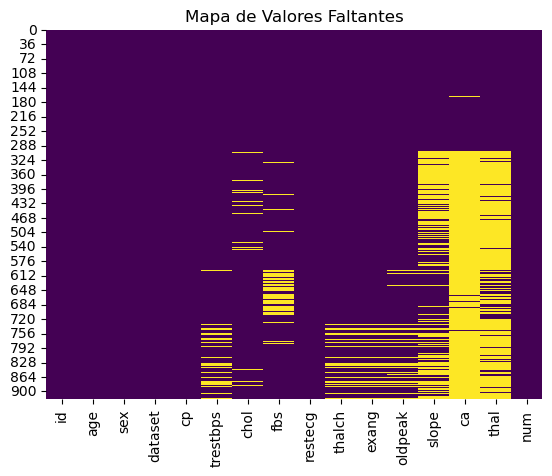

In [11]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Valores Faltantes")
plt.show()


In [12]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} tiene {len(outliers)} outliers.")


age tiene 0 outliers.
trestbps tiene 28 outliers.
chol tiene 183 outliers.
thalch tiene 2 outliers.
oldpeak tiene 16 outliers.


**Parte 2: Análisis Exploratorio de Datos (EDA)**

**Análisis Estadístico Descriptivo:**
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
* Analizar la distribución de las variables categóricas.

In [13]:
# Moda
print(df.mode())

      id   age   sex    dataset            cp  trestbps  chol    fbs restecg  \
0      1  54.0  Male  Cleveland  asymptomatic     120.0   0.0  False  normal   
1      2   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
2      3   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
3      4   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
4      5   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
..   ...   ...   ...        ...           ...       ...   ...    ...     ...   
915  916   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
916  917   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
917  918   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
918  919   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   
919  920   NaN   NaN        NaN           NaN       NaN   NaN    NaN     NaN   

     thalch  exang  oldpeak slope   ca 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [15]:
# Filtramos solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Calcular la varianza solo sobre las columnas numéricas
print(numerical_cols.var())

id          70610.000000
age            88.824691
trestbps      363.515007
chol        12272.387943
thalch        672.171813
oldpeak         1.190775
ca              0.875447
num             1.305748
dtype: float64


In [16]:
# Analizar la distribución de cada variable categórica
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Mostrar la frecuencia de cada categoría
for col in categorical_cols:
    print(f"\nDistribución de la variable {col}:")
    print(df[col].value_counts())


Distribución de la variable sex:
sex
Male      726
Female    194
Name: count, dtype: int64

Distribución de la variable dataset:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

Distribución de la variable cp:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Distribución de la variable fbs:
fbs
False    692
True     138
Name: count, dtype: int64

Distribución de la variable restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Distribución de la variable exang:
exang
False    528
True     337
Name: count, dtype: int64

Distribución de la variable slope:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

Distribución de la variable thal:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

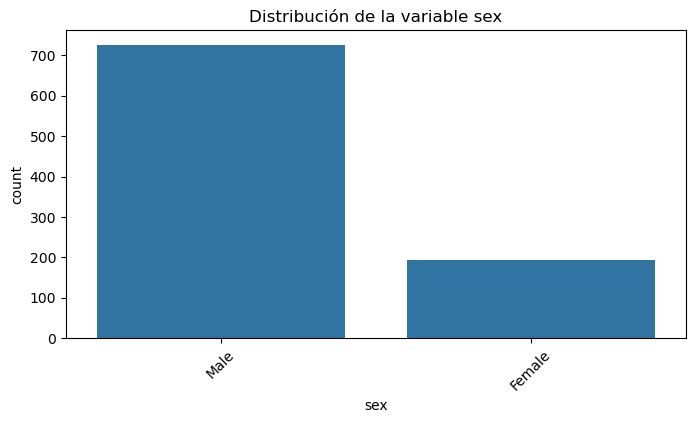

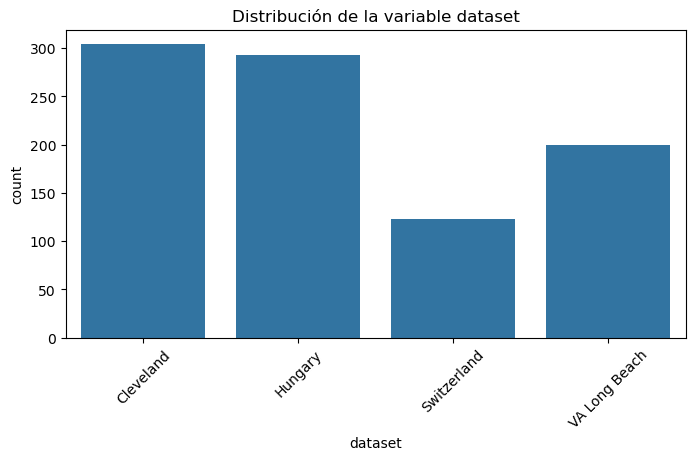

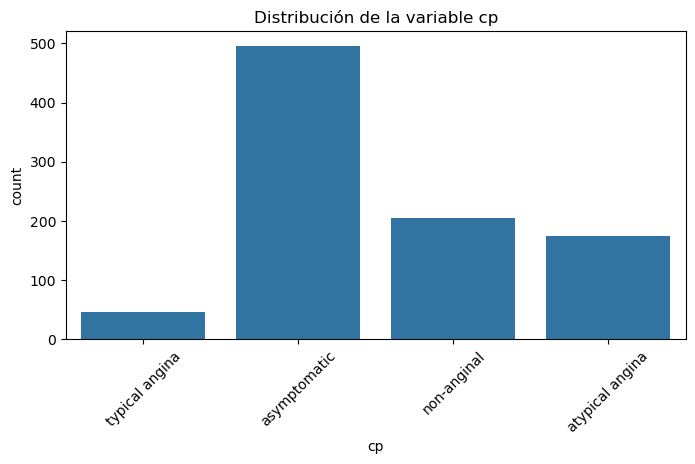

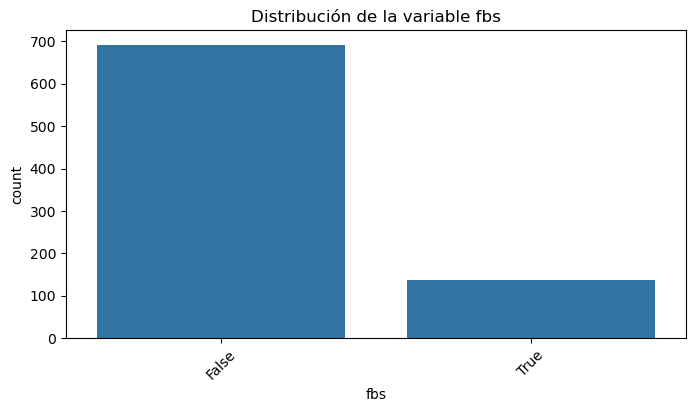

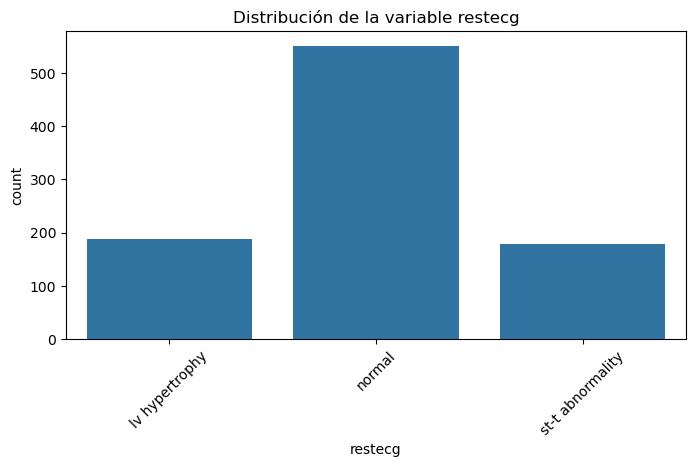

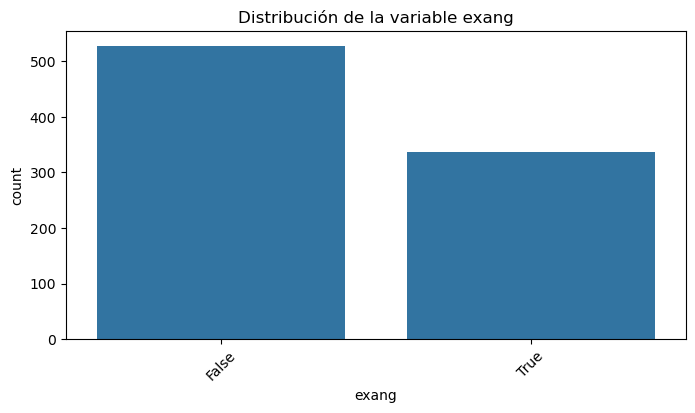

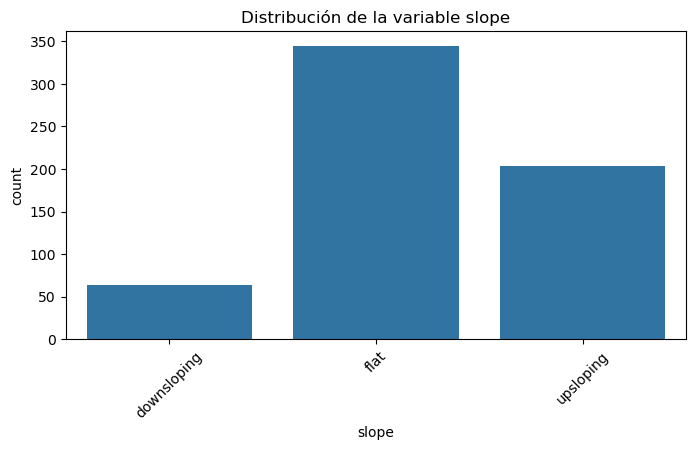

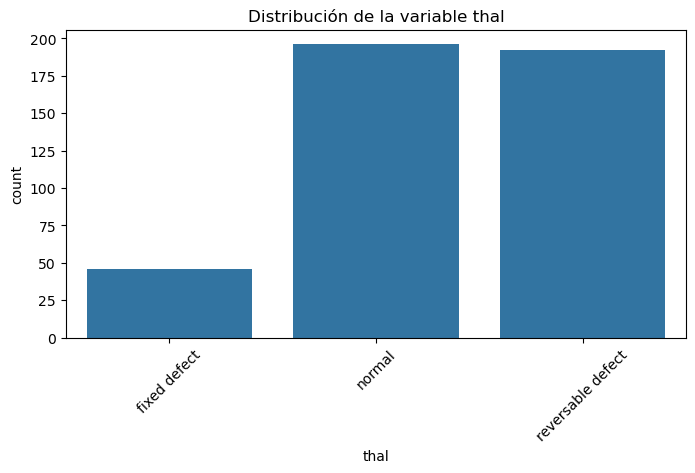

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para las gráficas
plt.figure(figsize=(10, 6))

# Graficar la distribución de cada variable categórica
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de la variable {col}')
    plt.xticks(rotation=45)
    plt.show()


**Visualizaciones:**
* Crear histogramas y gráficos de barras para entender la distribución de las variables.
* Crear un mapa de calor para visualizar las correlaciones entre las variables.
* Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

**Histogramas para entender la distribución de las variables numéricas**

<Figure size 1200x1000 with 0 Axes>

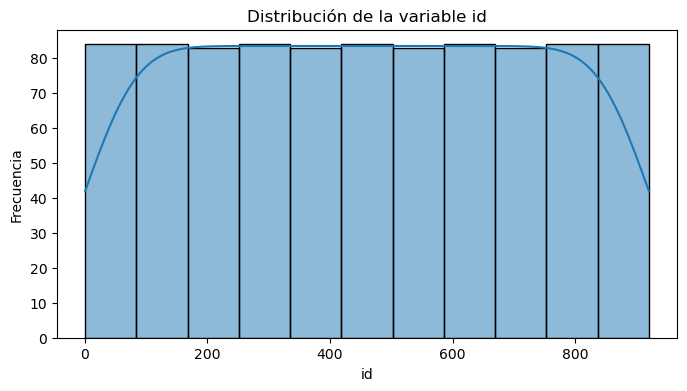

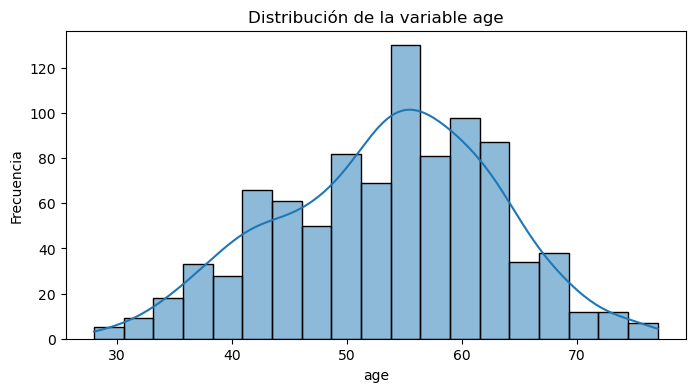

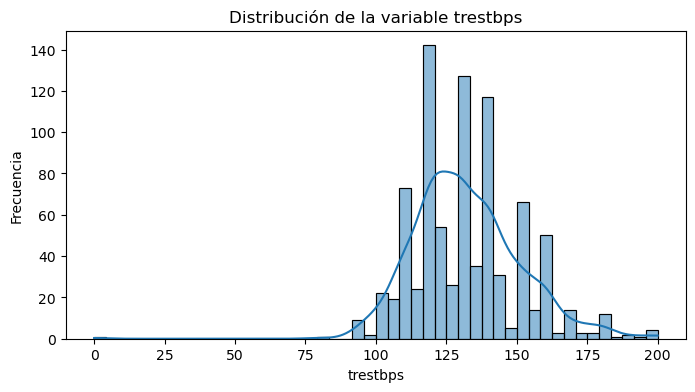

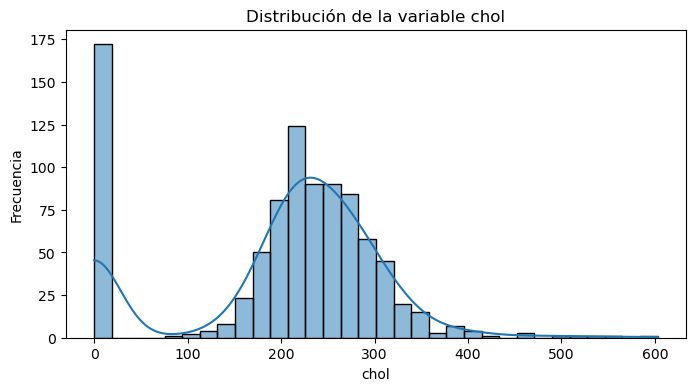

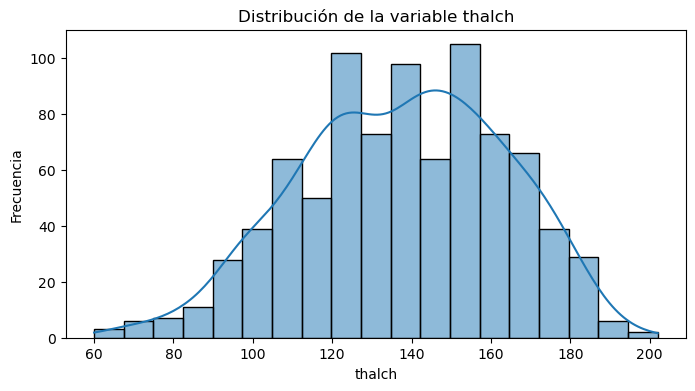

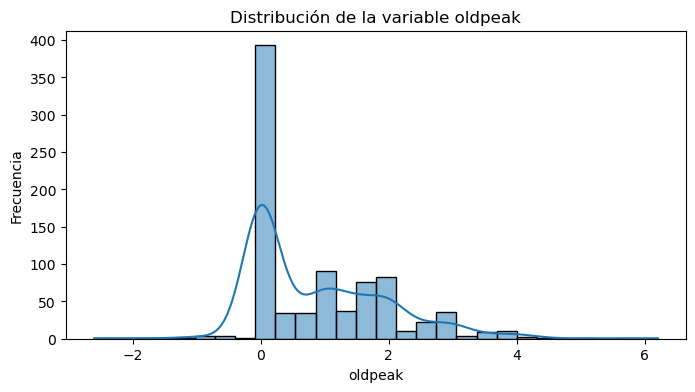

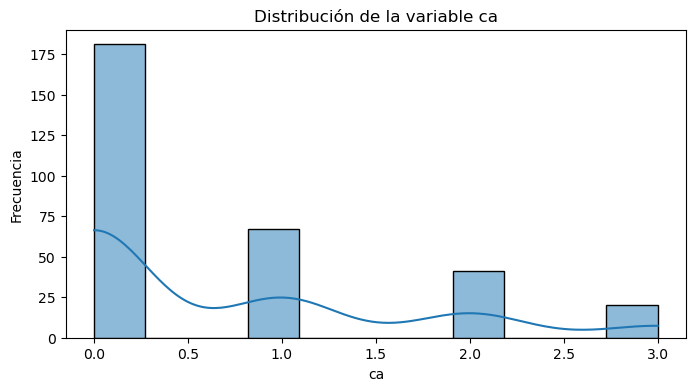

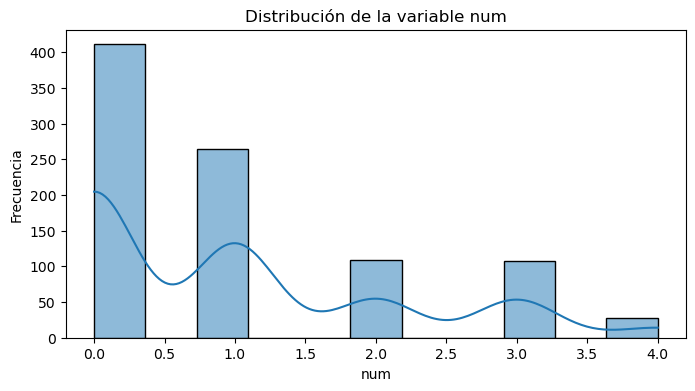

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histogramas para todas las variables numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Configuración para las gráficas
plt.figure(figsize=(12, 10))

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de la variable {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


**Mapa de calor para visualizar las correlaciones entre las variables**

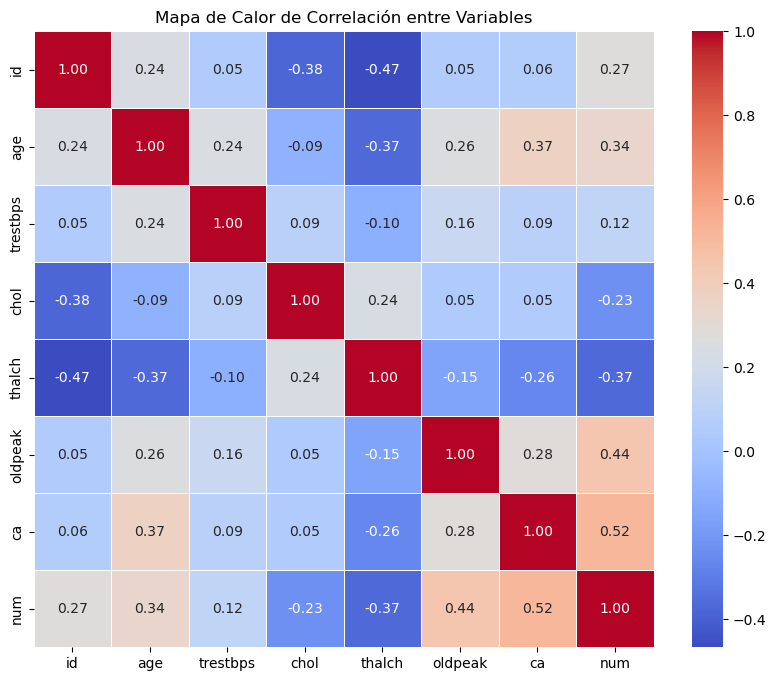

In [19]:
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas
label_encoder = LabelEncoder()

# Asumimos que 'sex' es una columna categórica con valores como 'Male' y 'Female'
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

# Ahora puedes realizar la correlación incluyendo la variable codificada
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()



**Gráficos de dispersión para identificar relaciones entre variables**

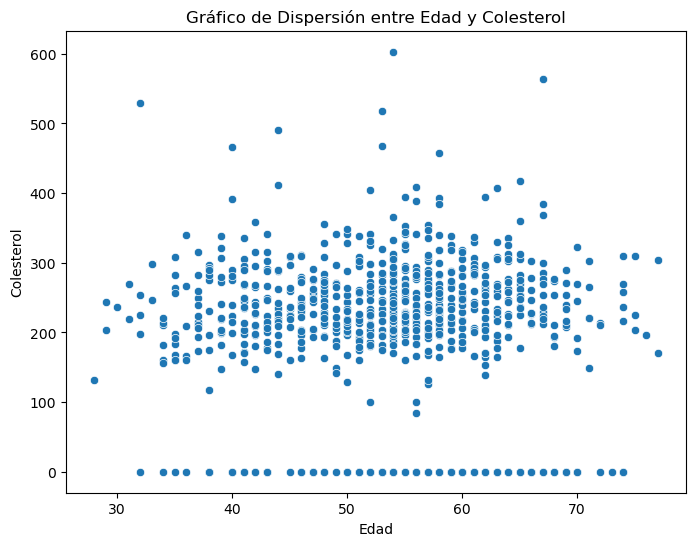

In [20]:
# Gráfico de dispersión entre dos variables numéricas (ejemplo con 'age' y 'chol')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', data=df)
plt.title('Gráfico de Dispersión entre Edad y Colesterol')
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.show()


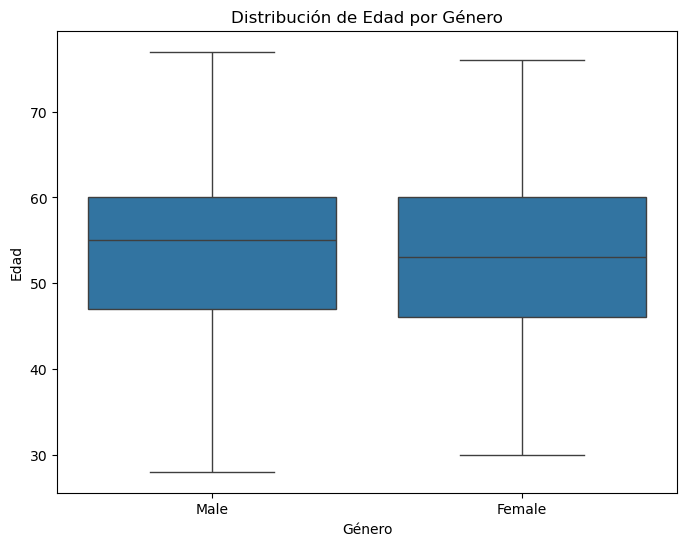

In [21]:
# Gráfico de dispersión entre una variable numérica y una categórica (ejemplo 'age' y 'sex')
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()


**Valores Faltantes y Outliers:**
* Detectar y tratar valores faltantes.
* Identificar y manejar outliers.

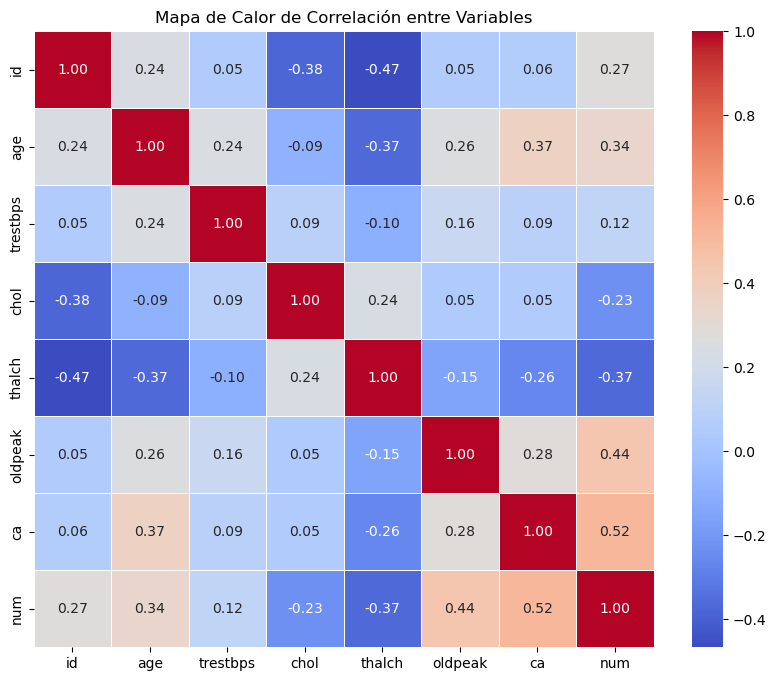

In [22]:
# Seleccionar solo columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación solo en columnas numéricas
correlation_matrix = numerical_df.corr()

# Mostrar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


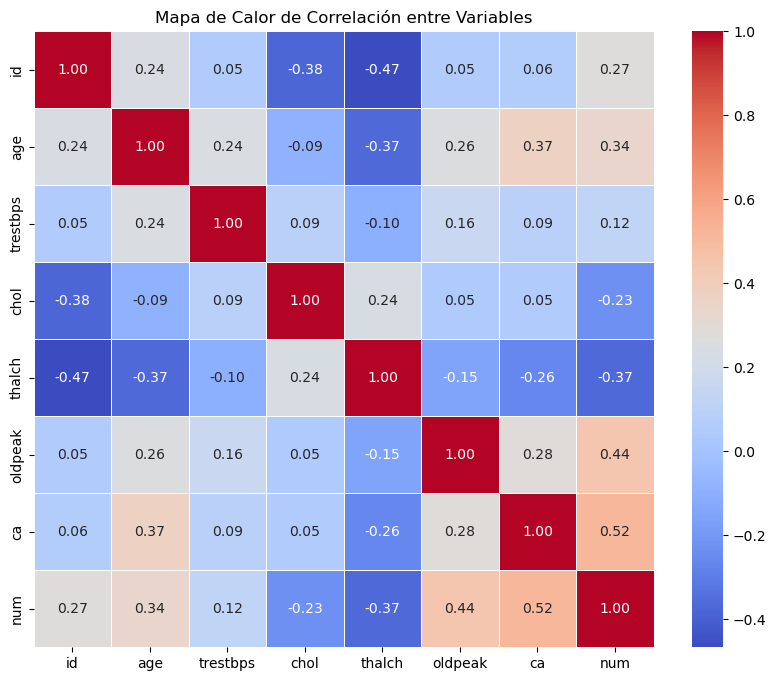

In [23]:
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas
label_encoder = LabelEncoder()

# Asumimos que 'sex' es una columna categórica con valores como 'Male' y 'Female'
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

# Ahora puedes realizar la correlación incluyendo la variable codificada
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


**Parte 3: Preprocesamiento de Datos**

**Transformación de Columnas:**
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

 **Codificación de Variables Categóricas (One-Hot Encoding)**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           920 non-null    int64  
 1   age          920 non-null    int64  
 2   sex          920 non-null    object 
 3   dataset      920 non-null    object 
 4   cp           920 non-null    object 
 5   trestbps     861 non-null    float64
 6   chol         890 non-null    float64
 7   fbs          830 non-null    object 
 8   restecg      918 non-null    object 
 9   thalch       865 non-null    float64
 10  exang        865 non-null    object 
 11  oldpeak      858 non-null    float64
 12  slope        611 non-null    object 
 13  ca           309 non-null    float64
 14  thal         434 non-null    object 
 15  num          920 non-null    int64  
 16  sex_encoded  920 non-null    int32  
dtypes: float64(5), int32(1), int64(3), object(8)
memory usage: 118.7+ KB


**Codificar Variables Categóricas (One-Hot Encoding)**

In [25]:
# Codificar las variables categóricas utilizando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)
print(df_encoded.head())


   id  age  trestbps   chol  thalch  oldpeak   ca  num  sex_encoded  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3  0.0    0            1      True   
1   2   67     160.0  286.0   108.0      1.5  3.0    2            1      True   
2   3   67     120.0  229.0   129.0      2.6  2.0    1            1      True   
3   4   37     130.0  250.0   187.0      3.5  0.0    0            1      True   
4   5   41     130.0  204.0   172.0      1.4  0.0    0            0     False   

   ...  cp_non-anginal  cp_typical angina  fbs_True  restecg_normal  \
0  ...           False               True      True           False   
1  ...           False              False     False           False   
2  ...           False              False     False           False   
3  ...            True              False     False            True   
4  ...           False              False     False           False   

   restecg_st-t abnormality  exang_True  slope_flat  slope_upsloping  \
0             

**Escalar Características Numéricas (StandardScaler)**

In [26]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Inicializar el scaler
scaler = StandardScaler()

# Aplicar el escalado a las columnas numéricas
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

print(df_encoded.head())


   id       age  trestbps      chol    thalch   oldpeak        ca  num  \
0   1  1.007386  0.675287  0.305908  0.480653  1.303159 -0.724064    0   
1   2  1.432034  1.462483  0.784599 -1.140262  0.569611  2.487454    2   
2   3  1.432034 -0.636705  0.269780 -0.329805  1.578239  1.416948    1   
3   4 -1.752828 -0.111908  0.459450  1.908602  2.403480 -0.724064    0   
4   5 -1.328180 -0.111908  0.043982  1.329704  0.477918 -0.724064    0   

   sex_encoded  sex_Male  ...  cp_non-anginal  cp_typical angina  fbs_True  \
0            1      True  ...           False               True      True   
1            1      True  ...           False              False     False   
2            1      True  ...           False              False     False   
3            1      True  ...            True              False     False   
4            0     False  ...           False              False     False   

   restecg_normal  restecg_st-t abnormality  exang_True  slope_flat  \
0           Fal

**División del Conjunto de Datos**

In [27]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['num'])  # 'num' es la variable objetivo
y = df_encoded['num']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar las dimensiones de los conjuntos de datos
print(X_train.shape, X_test.shape)


(736, 23) (184, 23)


**Parte 4: Implementación de XGBoost**

**Entrenamiento del Modelo:**
* Entrenar un modelo de XGBoost con hiperparámetros básicos.
* Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

**Entrenamiento del Modelo de XGBoost**

In [28]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Inicializar el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

**Predicciones y Evaluación del Modelo**

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Para un problema multiclase, usa 'micro', 'macro', o 'weighted' en el parámetro 'average'
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precisión: 0.579484572230014
Recall: 0.6141304347826086
F1-Score: 0.5907602361406709


In [31]:
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

print("Precisión por clase:", precision_per_class)
print("Recall por clase:", recall_per_class)
print("F1-Score por clase:", f1_per_class)


Precisión por clase: [0.74193548 0.62       0.3        0.33333333 0.33333333]
Recall por clase: [0.92       0.57407407 0.24       0.23076923 0.25      ]
F1-Score por clase: [0.82142857 0.59615385 0.26666667 0.27272727 0.28571429]


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Exactitud
accuracy = accuracy_score(y_test, y_pred)

# Precisión (usamos 'weighted' para manejar el desbalance de clases en problemas multiclase)
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

# ROC-AUC (requiere las probabilidades de las clases)
y_prob = xgb_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Imprimir métricas
print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Exactitud: 0.6141
Precisión: 0.5795
Recall: 0.6141
F1-Score: 0.5908
ROC-AUC: 0.8446


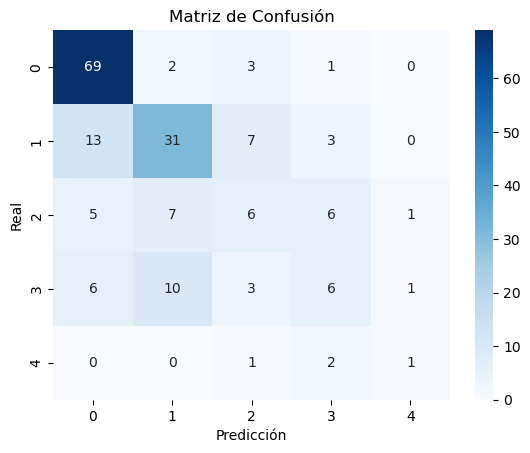

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


              precision    recall  f1-score   support

           0       0.74      0.92      0.82        75
           1       0.62      0.57      0.60        54
           2       0.30      0.24      0.27        25
           3       0.33      0.23      0.27        26
           4       0.33      0.25      0.29         4

    accuracy                           0.61       184
   macro avg       0.47      0.44      0.45       184
weighted avg       0.58      0.61      0.59       184



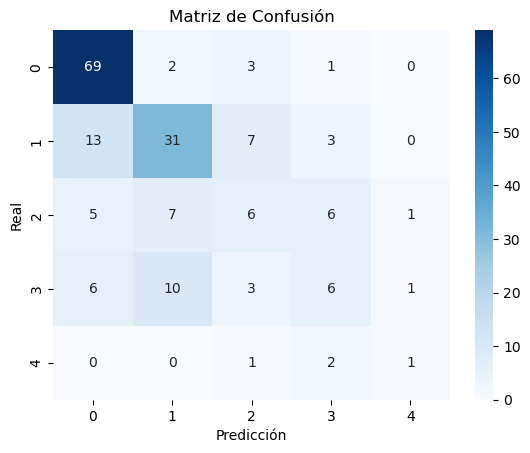

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar las predicciones con el xgb_modelo XGBoost
y_pred = xgb_model.predict(X_test)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


**Optimización de Hiperparámetros:**
* Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Definir los hiperparámetros a probar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Inicializar el clasificador
xgb = XGBClassifier()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor puntuación de validación cruzada: ", grid_search.best_score_)

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud en el conjunto de prueba: ", accuracy)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros encontrados:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Mejor puntuación de validación cruzada:  0.648041919470491
Exactitud en el conjunto de prueba:  0.592391304347826


**Evaluación del Modelo Optimizado:**
* Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predecir utilizando el mejor modelo encontrado
y_pred_optimized = best_model.predict(X_test)

# Calcular las métricas de rendimiento
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted')
recall_optimized = recall_score(y_test, y_pred_optimized, average='weighted')
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')

# Si es un problema binario, también podemos calcular ROC-AUC
roc_auc_optimized = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Mostrar resultados
print(f"Exactitud optimizada: {accuracy_optimized}")
print(f"Precisión optimizada: {precision_optimized}")
print(f"Recall optimizado: {recall_optimized}")
print(f"F1-Score optimizado: {f1_optimized}")
print(f"ROC-AUC optimizado: {roc_auc_optimized}")


Exactitud optimizada: 0.592391304347826
Precisión optimizada: 0.5369769450187108
Recall optimizado: 0.592391304347826
F1-Score optimizado: 0.5499347674485441
ROC-AUC optimizado: 0.8283004381166756


c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Evaluar el rendimiento del modelo inicial (sin optimización)**

In [40]:
# Inicializar el modelo de XGBoost sin optimización
xgb_initial = XGBClassifier()

# Entrenar el modelo inicial
xgb_initial.fit(X_train, y_train)

# Predecir utilizando el modelo inicial
y_pred_initial = xgb_initial.predict(X_test)

# Calcular las métricas de rendimiento
accuracy_initial = accuracy_score(y_test, y_pred_initial)
precision_initial = precision_score(y_test, y_pred_initial, average='weighted')
recall_initial = recall_score(y_test, y_pred_initial, average='weighted')
f1_initial = f1_score(y_test, y_pred_initial, average='weighted')

# Si es un problema binario, también podemos calcular ROC-AUC
roc_auc_initial = roc_auc_score(y_test, xgb_initial.predict_proba(X_test), multi_class='ovr')

# Mostrar resultados
print(f"Exactitud inicial: {accuracy_initial}")
print(f"Precisión inicial: {precision_initial}")
print(f"Recall inicial: {recall_initial}")
print(f"F1-Score inicial: {f1_initial}")
print(f"ROC-AUC inicial: {roc_auc_initial}")


Exactitud inicial: 0.6141304347826086
Precisión inicial: 0.579484572230014
Recall inicial: 0.6141304347826086
F1-Score inicial: 0.5907602361406709
ROC-AUC inicial: 0.8446333066063939


In [41]:
# Comparar resultados
print("Comparación de resultados:")
print(f"Exactitud: Inicial = {accuracy_initial}, Optimizada = {accuracy_optimized}")
print(f"Precisión: Inicial = {precision_initial}, Optimizada = {precision_optimized}")
print(f"Recall: Inicial = {recall_initial}, Optimizada = {recall_optimized}")
print(f"F1-Score: Inicial = {f1_initial}, Optimizada = {f1_optimized}")
print(f"ROC-AUC: Inicial = {roc_auc_initial}, Optimizada = {roc_auc_optimized}")


Comparación de resultados:
Exactitud: Inicial = 0.6141304347826086, Optimizada = 0.592391304347826
Precisión: Inicial = 0.579484572230014, Optimizada = 0.5369769450187108
Recall: Inicial = 0.6141304347826086, Optimizada = 0.592391304347826
F1-Score: Inicial = 0.5907602361406709, Optimizada = 0.5499347674485441
ROC-AUC: Inicial = 0.8446333066063939, Optimizada = 0.8283004381166756


**Comparación de resultados**

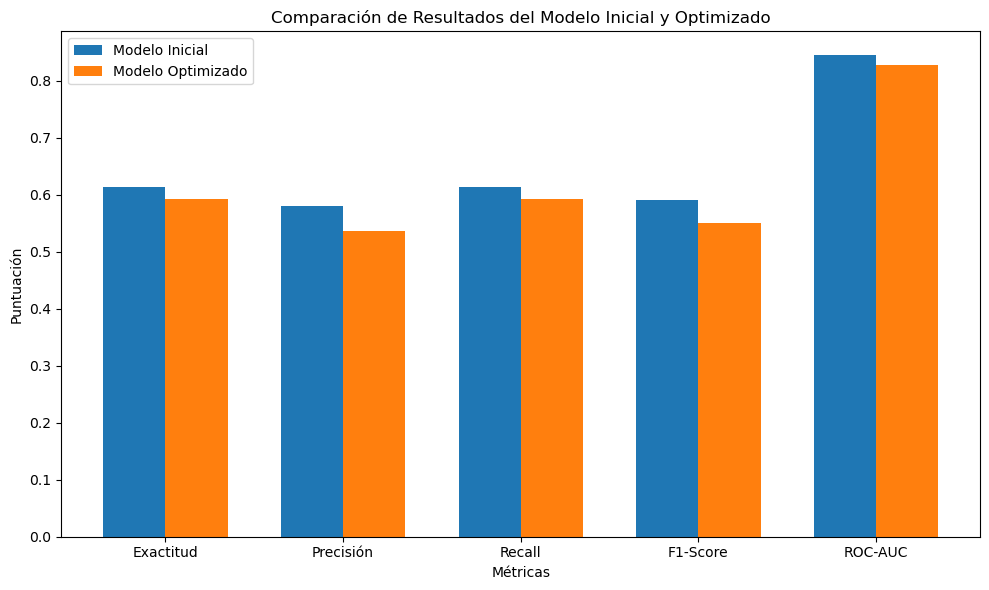

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de las métricas para el modelo inicial y el modelo optimizado
metricas = ['Exactitud', 'Precisión', 'Recall', 'F1-Score', 'ROC-AUC']
modelo_inicial = [accuracy_initial, precision_initial, recall_initial, f1_initial, roc_auc_initial]
modelo_optimizado = [accuracy_optimized, precision_optimized, recall_optimized, f1_optimized, roc_auc_optimized]

# Posiciones para las barras
x = np.arange(len(metricas))

# Ancho de las barras
width = 0.35

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para los resultados del modelo inicial y optimizado
bars1 = ax.bar(x - width/2, modelo_inicial, width, label='Modelo Inicial')
bars2 = ax.bar(x + width/2, modelo_optimizado, width, label='Modelo Optimizado')

# Etiquetas y título
ax.set_xlabel('Métricas')
ax.set_ylabel('Puntuación')
ax.set_title('Comparación de Resultados del Modelo Inicial y Optimizado')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


| Métrica       | Modelo Inicial  | Modelo Optimizado | Diferencia |
|---------------|-----------------|-------------------|------------|
| **Exactitud** | 0.6141          | 0.5924            | -0.0217    |
| **Precisión** | 0.5795          | 0.5370            | -0.0425    |
| **Recall**    | 0.6141          | 0.5924            | -0.0217    |
| **F1-Score**  | 0.5908          | 0.5499            | -0.0409    |
| **ROC-AUC**   | 0.8446          | 0.8283            | -0.0163    |
